In [1]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pylab as plt
from tqdm import tqdm_notebook as tqdm

from sklearn.manifold import TSNE

import gensim
from gensim import corpora, models, similarities 
from gensim import matutils
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim

np.random.seed(101)
rand_seed = 101

C:\Users\matt\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
%%time
ROOT = "./csv"
df = pd.read_csv(
    ROOT + "/propertweets.csv", 
    encoding='utf-8',
    nrows = 10000,
    low_memory=False, 
    parse_dates=False
)
del df['Unnamed: 0']

Wall time: 80.6 ms


In [3]:
%%time

# build the dictionary and corpus
tokens = [ast.literal_eval(token) for token in df['tokens'].values]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
print(dictionary)

Dictionary(11143 unique tokens: ['abu', 'bush', 'dhabi', 'elections', 'embraces']...)
Wall time: 412 ms


In [4]:
def create_LDA_model(num_topics, passes=1):
    """
    Function to create an LDA model that accepts number of topics
    """
    return gensim.models.ldamodel.LdaModel(
        corpus = tqdm(corpus, leave=False),
        id2word = dictionary,
        num_topics = num_topics, 
        random_state = rand_seed,
        eval_every = 10,
        chunksize = 2000,
        passes = passes,
        per_word_topics = True
    )

def optimize_model(rg=range(5, 25)):
    """
    Function to perform LDA analysis
    """
    models = []
    coherences = []
    
    for num_topics in tqdm(rg, leave=False):
        lda_model = create_LDA_model(num_topics, passes=5)
        models.append(lda_model)
        coherence = CoherenceModel(model = lda_model, texts = tokens, dictionary = dictionary, coherence = 'c_v').get_coherence()
        coherences.append(coherence)
      
    fig = plt.figure(figsize=(15, 5))
    plt.title('Choosing the optimal number of topics')
    plt.xlabel('Number of topics')
    plt.ylabel('Coherence')
    plt.grid(True)
    plt.plot(rg, coherences)
    
    return coherences, models

HBox(children=(IntProgress(value=0, max=5), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))

C:\Users\matt\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:775: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))

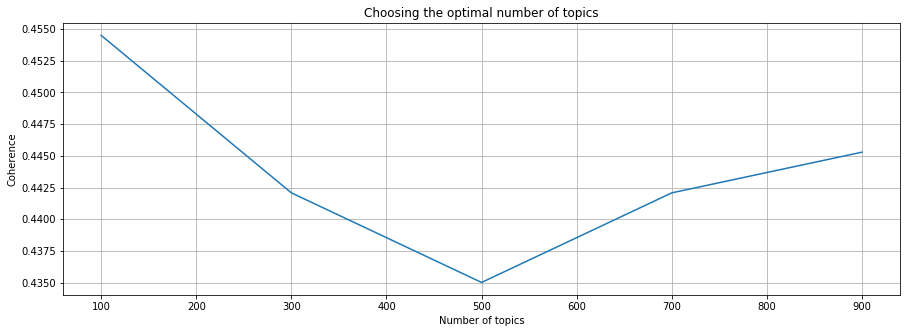

In [5]:
coherences, models = optimize_model(rg=range(100, 1001, 200))

In [6]:
lda = create_LDA_model(num_topics=45, passes=100)

HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))

In [7]:
lda.show_topics()

[(2,
  '0.040*"flynn" + 0.040*"trump" + 0.023*"dossier" + 0.019*"fisa" + 0.018*"warrant" + 0.017*"cnn" + 0.017*"hillary" + 0.016*"clinton" + 0.015*"investigation" + 0.014*"steele"'),
 (36,
  '0.082*"ta" + 0.074*"voted" + 0.063*"trillion" + 0.059*"rand" + 0.037*"top" + 0.032*"paul" + 0.032*"head" + 0.029*"michaelslinden" + 0.029*"cuaaaaaarrgggghghghghghghhghhghhg" + 0.029*"eplodes"'),
 (19,
  '0.054*"memo" + 0.041*"nunes" + 0.031*"read" + 0.021*"cut" + 0.020*"estimate" + 0.019*"suppo" + 0.019*"grassley" + 0.018*"gt" + 0.016*"fbi" + 0.014*"graham"'),
 (37,
  '0.079*"house" + 0.061*"white" + 0.051*"obama" + 0.048*"clinton" + 0.044*"trump" + 0.034*"cleansing" + 0.034*"demanded" + 0.033*"spiritual" + 0.030*"melania" + 0.028*"removal"'),
 (27,
  '0.032*"obama" + 0.027*"daca" + 0.027*"treason" + 0.026*"ngop" + 0.024*"trump" + 0.021*"nhe" + 0.020*"mueller" + 0.018*"committed" + 0.016*"course" + 0.015*"obamagate"'),
 (18,
  '0.027*"obama" + 0.026*"trump" + 0.016*"donald" + 0.016*"mueller" + 0.0

In [8]:
topics_matrix = lda.show_topics(formatted=False, num_words=20)
topics_matrix = np.array(topics_matrix, dtype=object)

# topics_matrix.shape
topic_words = topics_matrix[:,1]
for i in topic_words:
    print([str(word) for word in i])
    print()

["('tweet', 0.027781315)", "('person', 0.026560687)", "('funder', 0.024600528)", "('speakerryan', 0.023812862)", "('intelligence', 0.02316218)", "('maga', 0.022884369)", "('committee', 0.021534162)", "('law', 0.02117928)", "('single', 0.02062663)", "('removenunes', 0.019732371)", "('love', 0.019313352)", "('americans', 0.018471105)", "('retweets', 0.018028315)", "('man', 0.01595675)", "('find', 0.015181683)", "('washington', 0.015143818)", "('claims', 0.014414363)", "('post', 0.0136677725)", "('owe', 0.012535527)", "('illegals', 0.012441021)"]

["('government', 0.053018752)", "('fisa', 0.03390238)", "('iran', 0.027708653)", "('scandal', 0.025804663)", "('defense', 0.024598703)", "('defending', 0.024202157)", "('press', 0.02398374)", "('actions', 0.023555726)", "('gate', 0.022591366)", "('wrongdoing', 0.022188326)", "('worrisome', 0.021388512)", "('watergate', 0.021244794)", "('contra', 0.02097354)", "('political', 0.019242711)", "('attacks', 0.015029229)", "('mueller', 0.0145890815)", 

In [9]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(panel, './plots/pyLDAvis2.html')

C:\Users\matt\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]
